# Lecture 19 
## CS365 Foundations of Data Science, Prof. Tsourakakis 

Today we will explore the Singular Value Decomposition (SVD) and Principal Component Analysis (PCA) that you have already seen in the prerequisite class [CS132 Geometric Algorithms](https://github.com/mcrovella/CS132-Geometric-Algorithms). The assigned readings are the following materials: 


### Readings 
- Sections 3.1 to 3.6 and Section 12.8  from the [Foundations of Data Science book](https://www.cs.cornell.edu/jeh/book.pdf).
- Class materials and notes, including this notebook.

# PCA and its relation to SVD 

Recall that Singular Value Decomposition (SVD) is a technique used to decompose a matrix into three simpler matrices. This technique is widely used in data science, machine learning, and image processing. The three matrices that make up the decomposition are:

- $U$: a matrix containing the left singular vectors of the original matrix.
- $S$: a diagonal matrix containing the singular values of the original matrix.
- $V^T$: a matrix containing the right singular vectors of the original matrix.


SVD is useful for reducing the dimensionality of a dataset, for example, to perform principal component analysis (PCA). It is also used in recommendation systems, image compression, and signal processing. We will see more examples later.

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
import cv2
from sklearn.decomposition import PCA


In [ ]:
# Mersenne Twister pseudo-random number generator.
rng = np.random.RandomState(None) 

Let's generate a random cloud of 2000 2d points, and visualize it as follows.


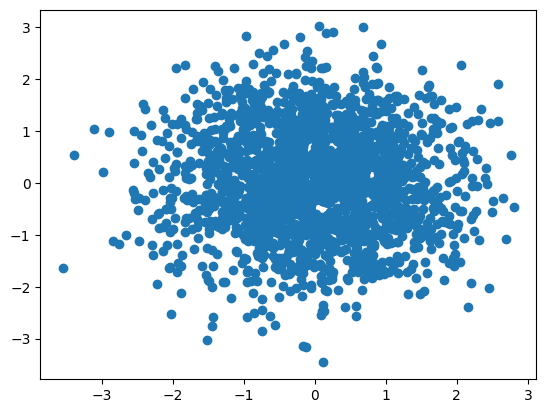

In [ ]:
Y = rng.randn(2, 2000)
plt.scatter(Y[0, :], Y[1, :])

In [ ]:
np.corrcoef(Y)


array([[ 1.        , -0.01506826],
       [-0.01506826,  1.        ]])

Let's perform a special linear transformation, create a new dataset X1, and visualize it. What do you observe and why? Why do all points line now on a line?




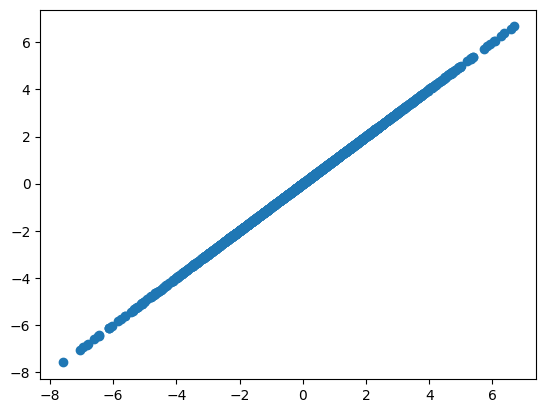

In [ ]:
X1 = np.dot(np.array([[1, 2], [1, 2]]), Y)
plt.scatter(X1[0, :], X1[1, :])

In [ ]:
np.corrcoef(X1)


array([[1., 1.],
       [1., 1.]])

Let's create a slightly different mapping, but still make sure most of the data variance is along one of the two dimensions.



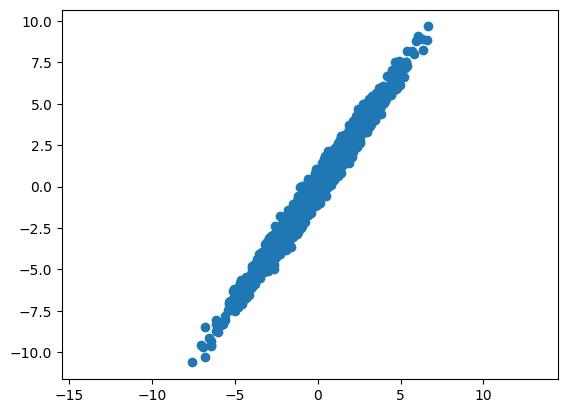

In [ ]:
X = np.dot(np.array([[1, 2], [1, 3]]), Y)
plt.scatter(X[0, :], X[1, :])
plt.axis('equal');

In [ ]:
np.corrcoef(X)


array([[1.        , 0.98960585],
       [0.98960585, 1.        ]])

**Question** Explain why you observe the above transformations and values for corrcoeff.  

In [ ]:
pca = PCA(n_components=2)
pca.fit(X.T)

PCA(n_components=2)

In [ ]:
print(pca.components_)


[[-0.57575738 -0.8176206 ]
 [-0.8176206   0.57575738]]


In [ ]:
print(pca.explained_variance_/pca.explained_variance_.sum()) 


[0.99538503 0.00461497]


This information is encoded in the singular values. Specifically:

In [ ]:
np.square(pca.singular_values_)/(np.square(pca.singular_values_).sum())


array([0.99538503, 0.00461497])

Let's project the data into the top principal component (PC).

In [ ]:
pca = PCA(n_components=1)
pca.fit(X.T)
X_pca = pca.transform(X.T)
print("original shape:   ", X.T.shape)
print("transformed shape:", X_pca.shape)

original shape:    (2000, 2)
transformed shape: (2000, 1)


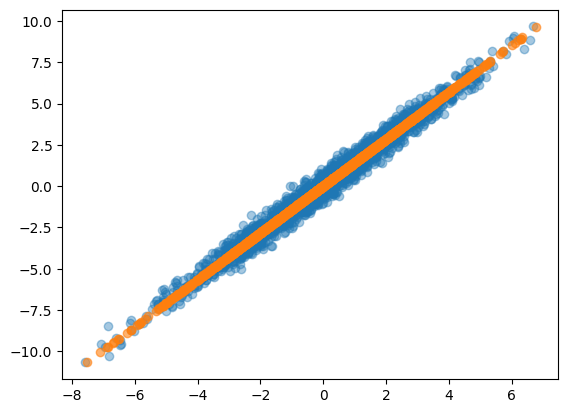

In [ ]:

X_proj = pca.inverse_transform(X_pca)
X = X.T
plt.scatter(X[:, 0], X[:, 1], alpha=0.4)
plt.scatter(X_proj[:, 0], X_proj[:, 1], alpha=0.6)

In [ ]:
np.corrcoef(X.T)


array([[1.        , 0.98960585],
       [0.98960585, 1.        ]])

In [ ]:
np.corrcoef(X_proj.T)


array([[1., 1.],
       [1., 1.]])

Let's verify some othe properties we saw from class. First let's compute the eigenvalue decomposition of $X^TX$

In [ ]:
lmbda, v = np.linalg.eig(np.dot(X.T,X))
print(lmbda)
print(v)

[  139.2471242  30023.15310264]
[[-0.81762394 -0.57575263]
 [ 0.57575263 -0.81762394]]


In [ ]:
# top PC
print(pca.components_.T)


[[-0.57575738]
 [-0.8176206 ]]


Let's recompute it to see both PCs.

In [ ]:
pca = PCA(n_components=2)
pca.fit(X)
print(pca.components_.T)

[[-0.57575738 -0.8176206 ]
 [-0.8176206   0.57575738]]


In [ ]:
print("Singular values")
sigma = pca.singular_values_
print( round(sigma[0],1) )
print( round(sigma[1],1) )

print("Square root of eigevalues of X'X")
print( round( np.sqrt(lmbda[0]),1) )
print( round( np.sqrt(lmbda[1]),1) )

Singular values
173.3
11.8

Square root of eigevalues of X'X
11.8
173.3


In [ ]:
lmbda2, v2 = np.linalg.eig(np.dot(X,X.T))
print(lmbda2)

[3.00231531e+04+0.00000000e+00j 1.39247124e+02+0.00000000e+00j
 2.32950490e-12+2.77257117e-12j ... 2.33358686e-18+1.98694423e-18j
 2.33358686e-18-1.98694423e-18j 4.73625770e-19+0.00000000e+00j]


The complex numbers here are due to numerical issues. Same thing for the values that are close to 0. We can resolve this easily as follows:

In [ ]:
print(lmbda2.real)


[3.00231531e+04 1.39247124e+02 2.32950490e-12 ... 2.33358686e-18
 2.33358686e-18 4.73625770e-19]


Again, only the first two eigenvalues are truly non-zero, the remaining ones appear to be non-zero due to numerical errors. This can be verified by checking the rank which is equal to 2 as expected (**why?**)

In [ ]:
np.linalg.matrix_rank(np.dot(X,X.T))


2

Finally let's look the singular value decomposition of $X$. What do you observe?



In [ ]:
np.linalg.svd(X)


(array([[-1.46198617e-02,  3.88395863e-04,  6.84675187e-04, ...,
         -6.98721727e-03, -2.30137272e-02,  3.17085758e-02],
        [ 1.10916467e-02, -1.19653388e-02,  1.16351034e-02, ...,
         -1.23752897e-02, -1.37666116e-03,  1.50918479e-02],
        [-5.31675496e-04,  1.16436239e-02,  9.99865804e-01, ...,
          1.47084625e-04,  3.18209254e-05, -1.95491909e-04],
        ...,
        [-5.65912661e-03, -1.30365229e-02,  1.47658222e-04, ...,
          9.99799705e-01, -1.75912402e-04,  4.04464839e-04],
        [-2.27439157e-02, -3.76720121e-03,  3.39225631e-05, ...,
         -1.78079871e-04,  9.99475706e-01,  7.43233408e-04],
        [ 2.99616573e-02,  1.83143177e-02, -1.98316410e-04, ...,
          4.06725017e-04,  7.40841576e-04,  9.98778644e-01]]),
 array([173.27190512,  11.80030187]),
 array([[ 0.57575263,  0.81762394],
        [ 0.81762394, -0.57575263]]))

Let's see this in greater detail with another example. Specifically, how would you compute the PCA assuming you could just call an SVD function?

In [ ]:
def compare_pca(data):
    # Perform PCA using SVD
    U, s, VT = np.linalg.svd(data - np.mean(data, axis=0))
    pcs_svd = VT.T
    
    # Perform PCA using scikit-learn
    pca = PCA()
    pca.fit(data)
    pcs_sklearn = pca.components_.T
    
    return pcs_svd, pcs_sklearn

In [ ]:
data = np.random.rand(100, 5)
pcs_svd, pcs_sklearn = compare_pca(data)
print(pcs_svd)
print(pcs_sklearn)

[[ 0.339028    0.1796527  -0.54724711 -0.32484585 -0.66916418]
 [-0.44640461  0.18064378  0.03743157 -0.85127919  0.20497163]
 [ 0.51147024 -0.09097053 -0.477831   -0.14139456  0.69412367]
 [-0.08931328 -0.96223006 -0.07160338 -0.19652702 -0.14962128]
 [ 0.64513895 -0.03050238  0.68240015 -0.3334421  -0.07753538]]
[[ 0.339028    0.1796527  -0.54724711 -0.32484585 -0.66916418]
 [-0.44640461  0.18064378  0.03743157 -0.85127919  0.20497163]
 [ 0.51147024 -0.09097053 -0.477831   -0.14139456  0.69412367]
 [-0.08931328 -0.96223006 -0.07160338 -0.19652702 -0.14962128]
 [ 0.64513895 -0.03050238  0.68240015 -0.3334421  -0.07753538]]


In [ ]:
pcs_svd-pcs_sklearn

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

## SVD as the best k-rank approximation 


SVD is commonly used for image compression, reducing the dimensionality of a dataset, and for data compression in general. By retaining only the largest singular values and their corresponding singular vectors, we can reduce the size of a dataset while preserving most of the information (**question**: what is the space we use when we perform a k-rank approximation?)

By retaining only the largest singular values and their corresponding singular vectors, we can effectively reduce the size of a dataset while still preserving most of its important information. This is because the largest singular values and their vectors capture the most variation in the original data, while the smaller singular values and vectors capture noise and other unimportant information.

In the context of image compression, for example, we can apply SVD to the pixel values of an image matrix to obtain the left singular vector matrix, singular value diagonal matrix, and right singular vector matrix. We can then choose to retain only the top k singular values and their corresponding vectors, effectively compressing the image into a smaller set of values. This compressed representation can then be used to reconstruct a close approximation of the original image, with the degree of approximation depending on the number of singular values retained.


The Eckart-Young-Mirsky theorem guarantees that the truncated SVD X_k minimizes the Frobenius norm approximation error among all rank-k matrices, i.e., all matrices M of rank at most k. In other words, for any rank-k matrix M, we have:

$$ ||X - X_k||_F \leq ||X - M||_F $$


This means that the truncated SVD approximation is the best rank-k approximation of X in terms of the Frobenius norm.

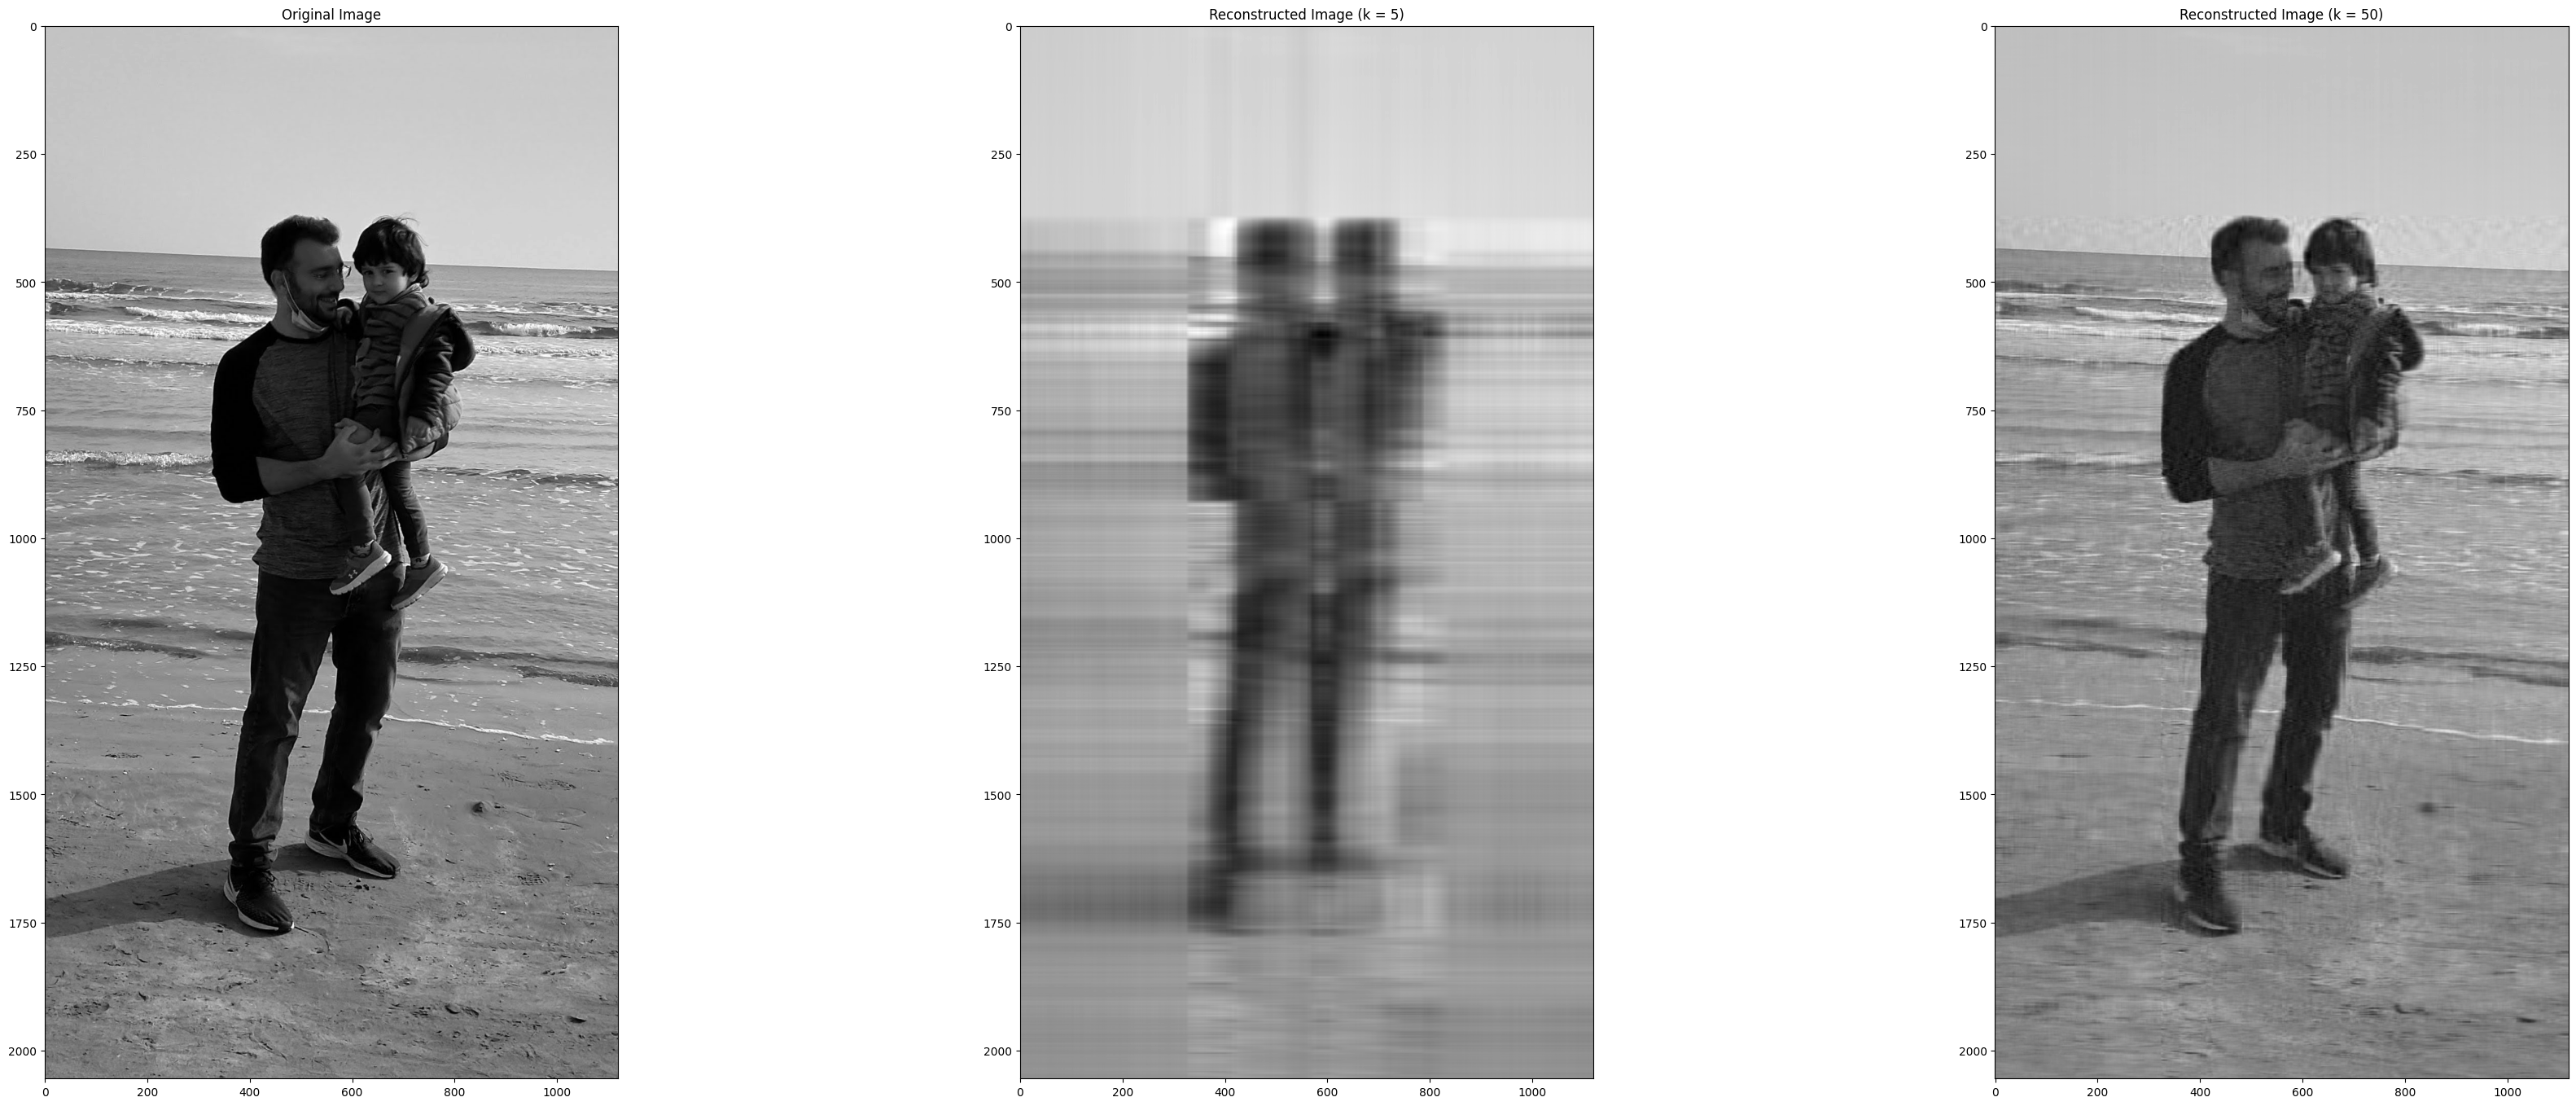

In [ ]:

# Load the image
img = cv2.imread('larnaca.jpeg', cv2.IMREAD_GRAYSCALE)

# Apply SVD to the image
U, S, VT = np.linalg.svd(img)

# Define the number of singular values to retain (k)
k = 5

# Reconstruct the image using only k singular values
img_reconstructed = U[:, :k] @ np.diag(S[:k]) @ VT[:k, :]

k2 = 50
img_reconstructed2 = U[:, :k2] @ np.diag(S[:k2]) @ VT[:k2, :]

fig, axs = plt.subplots(1, 3, figsize=(40, 32))

# Plot the original and reconstructed images
plt.subplot(1, 3, 1)

plt.imshow(img, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(img_reconstructed, cmap='gray')
plt.title('Reconstructed Image (k = %d)' % k)


plt.subplot(1, 3, 3)
plt.imshow(img_reconstructed2, cmap='gray')
plt.title('Reconstructed Image (k = %d)' % k2)

plt.subplots_adjust(wspace=0.7)

plt.show()
